In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

### Simple Liner Regression

In [40]:
df = pd.read_csv("Data/placement.csv")
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [41]:
x = df.iloc[:, 0].values
y = df.iloc[:, 1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

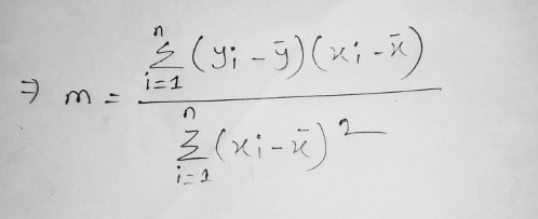

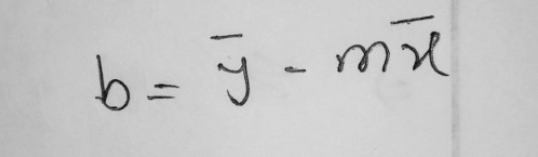

In [42]:
class LinearRegression:
    def __init__(self) -> None:
        self.m = None
        self.b = None
    
    def fit(self, x_train, y_train):
        x_mean = np.mean(x_train)
        y_mean = np.mean(y_train)

        numerator = 0
        denominator = 0

        for i in range(x_train.shape[0]):
            numerator += (x_train[i] - x_mean) * (y_train[i] - y_mean)
            denominator += np.square(x_train[i] - x_mean)

        self.m = numerator/denominator
        self.b = y_mean - (self.m * x_mean)

    def predict(self, x_test):
        return self.m * x_test + self.b

In [43]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
r2_score(y_test, y_pred)

0.7807301475103842

### Multiple Linear Regression

In [44]:
from sklearn.datasets import load_diabetes
x, y = load_diabetes(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

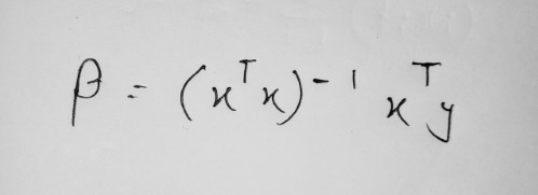

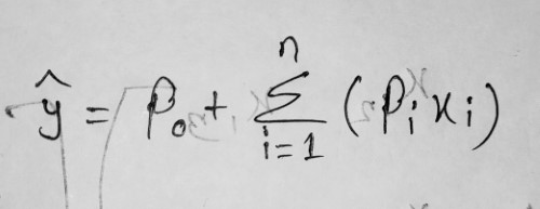

In [45]:
class MultipleLinearRegression:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
    
    def fit(self, x_train, y_train):
        x_train = np.insert(x_train, 0, 1, axis=1)
        bita = np.linalg.inv(np.dot(x_train.T, x_train)).dot(np.dot(x_train.T, y_train))
        self.intercept_ = bita[0]
        self.coef_ = bita[1:]

    def predict(self, x_test):
        y_pred = np.dot(x_test, self.coef_) + self.intercept_
        return y_pred

In [46]:
mlr = MultipleLinearRegression()
mlr.fit(x_train, y_train)
y_pred = mlr.predict(x_test)
r2_score(y_test, y_pred)

0.4399338661568971

### Polynomial Regression

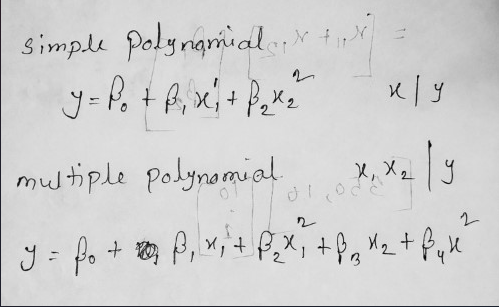

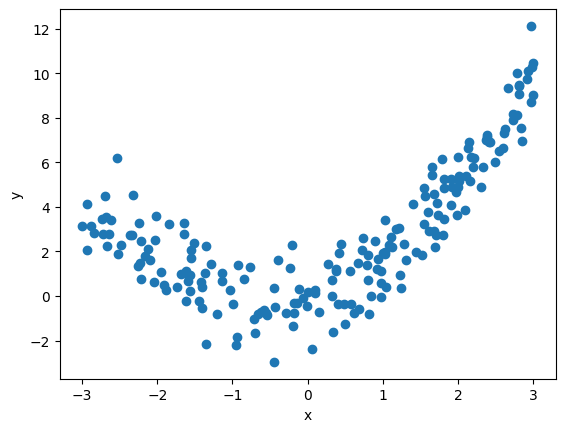

In [47]:
#Example of Data Type for Polynomial Regression
x = 6*np.random.rand(200, 1) -3
y = 0.8 * x**2 + 0.9 * x + np.random.randn(200, 1)


plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()